<font color='#00FF00'>
<font size = '6'>
Spotify top charts analysis</font>
 

<font color='FF FF E0'>
<font size = '4'>
Goal:
to figure out whether it is possible for new singers to enter the Spotify top charts or they should stop trying and find a normal job.

All info was taken from this data frames:
https://www.kaggle.com/datasets/mkmotsumi/rawdataset ,
spotify_top_charts_22
</font>

<font color='FF FF E0'>
<font size = '4'>
Team 8: Olena Hnyp, Nastia Dynia, Sophia Dyshleva, Ustym Hentosh</font>

Importing needed modules

In [2]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

Reading main csv

In [ ]:
def read_data(path_to_file):
    """
    Reads csv file
    """
    df = pd.read_csv(path_to_file)
    # print(df)
    return df


df = read_data('charts.csv')


Cutting main dataset depending on the year

In [ ]:
df_2017 = df[df.date.str.startswith("2017")].drop(
    ['rank', 'date', 'url', 'region', 'chart', 'trend', 'streams'], axis=1)
df_2018 = df[df.date.str.startswith("2018")].drop(
    ['rank', 'date', 'url', 'region', 'chart', 'trend', 'streams'], axis=1)
df_2019 = df[df.date.str.startswith("2019")].drop(
    ['rank', 'date', 'url', 'region', 'chart', 'trend', 'streams'], axis=1)
df_2020 = df[df.date.str.startswith("2020")].drop(
    ['rank', 'date', 'url', 'region', 'chart', 'trend', 'streams'], axis=1)
df_2021 = df[df.date.str.startswith("2021")].drop(
    ['rank', 'date', 'url', 'region', 'chart', 'trend', 'streams'], axis=1)


Finding out how many artists were in top charts only once

In [ ]:
appearances = {}
appearances[2017] = [df_2017.artist.value_counts().reset_index().query('artist == 1').shape[0],
                     df_2017.artist.value_counts().shape[0]]
appearances[2018] = [df_2018.artist.value_counts().reset_index().query('artist == 1').shape[0],
                     df_2018.artist.value_counts().shape[0]]
appearances[2019] = [df_2019.artist.value_counts().reset_index().query('artist == 1').shape[0],
                     df_2019.artist.value_counts().shape[0]]
appearances[2020] = [df_2020.artist.value_counts().reset_index().query('artist == 1').shape[0],
                     df_2020.artist.value_counts().shape[0]]
appearances[2021] = [df_2021.artist.value_counts().reset_index().query('artist == 1').shape[0],
                     df_2021.artist.value_counts().shape[0]]
appearances


Creating top 22 for each year

In [ ]:
def create_top_22(df, years: list):
    for year in years:
        df_raw = df[df.date.str.startswith(str(year))]
        df_raw = df_raw.drop(['rank', 'date', 'url', 'region', 'chart', 'trend', 'streams'], axis = 1)
        top_artists = df_raw.artist.value_counts().head(22).reset_index()
        top_artists = top_artists.rename(columns = {'index' : 'Artist', 'artist': 'Artist_counts'})
        top_songs = df_raw.title.value_counts().head(22).reset_index()
        top_songs = top_songs.rename(columns = {'index' : 'Title', 'title': 'Tytle_counts'})
        result = pd.concat([top_artists, top_songs], axis = 1).reset_index()
        del result['index']
        result.index += 1
        result.to_csv(f'top_chart_{year}.csv')
    return None
create_top_22(df, [2017 ,2018, 2019, 2020, 2021])

Finding the most popular song of each singer in the top chart

In [ ]:
def create_top_22_corresponding_songs(df, years: list):
    for year in years:
        df_raw = df[df.date.str.startswith(str(year))]
        df_raw = df_raw.drop(
            ['rank', 'date', 'url', 'region', 'chart', 'trend', 'streams'], axis=1)
        top_artists = df_raw.artist.value_counts().head(22).reset_index()
        top_artists = top_artists.rename(
            columns={'index': 'Artist', 'artist': 'Artist_counts'})
        lst = []
        for i in list(top_artists.Artist.values):
            lst.append(df_raw[df_raw.artist.str.startswith(
                i, na=False)].title.value_counts().index[0])
        top_artists['Artist_song'] = lst
        lst1 = []
        for j in list(top_artists.Artist_song.values):
            lst1.append(df_raw[df_raw.title.str.startswith(
                j, na=False)].value_counts().max())
        top_artists['Artist_song_counts'] = lst1

        top_artists.index += 1
        top_artists.to_csv(
            f'top_chart_corresponding_songs_with_count_{year}.csv')
    return None


create_top_22_corresponding_songs(df, [2017, 2018, 2019, 2020, 2021])


<font color='>#00FF00'>
<font size = '6'>
Analysis of actual top charts in 2022</font>

<font color='FF FF E0'>
<font size = '6'>
2022</font>

Reading file with data from 2022. Creating top 22 singers in 2022

In [16]:

df1 = pd.read_csv('spotify_top_charts_22.csv', index_col=False)
df1 = df1.loc[:21, ["artist_names", "track_name"]]
df1

,artist_names,track_name
0,Glass Animals,Heat Waves
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber)
2,Anitta,Envolver
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...
4,GAYLE,abcdefu
5,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix
6,"Becky G, KAROL G",MAMIII
7,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow)
8,"Rauw Alejandro, Chencho Corleone",Desesperados
9,Ed Sheeran,Shivers


Set of 22 most popular singers in 2022

In [17]:
set1 = set(df1["artist_names"])

<font color='>#00FF00'>
<font size = '6'>
Analysis of five years before 2022</font>

<font color='FF FF E0'>
Columns: 'Artist' - name of singer/band, 'Artist_counts' - number of getting this singer in top charts, 'Title' - name of the most popular song of this singer</font>

<font color='FF FF E0'>
Visualized table for each year</font>

<font color='FF FF E0'>
<font size = '6'>
2017</font>

Reading file with data from 2017. Creating top 22 singers in 2017

In [3]:
df2 = pd.read_csv('top_chart_2017.csv', index_col=False)
df2 = df2.loc[:, ["Artist", "Artist_counts", "Title"]]
df2

,Artist,Artist_counts,Title
0,Ed Sheeran,138280,Shape of You
1,Imagine Dragons,42612,Despacito (Featuring Daddy Yankee)
2,Kendrick Lamar,34252,Believer
3,Shawn Mendes,33930,Something Just Like This
4,Charlie Puth,33648,I Don’t Wanna Live Forever (Fifty Shades Darke...
5,Bruno Mars,33525,Rockabye (feat. Sean Paul & Anne-Marie)
6,Major Lazer,33323,It Ain't Me (with Selena Gomez)
7,Clean Bandit,32616,Unforgettable
8,The Chainsmokers,31677,Scared to Be Lonely
9,Drake,31167,Closer


<AxesSubplot: xlabel='Artist_counts', ylabel='Artist'>

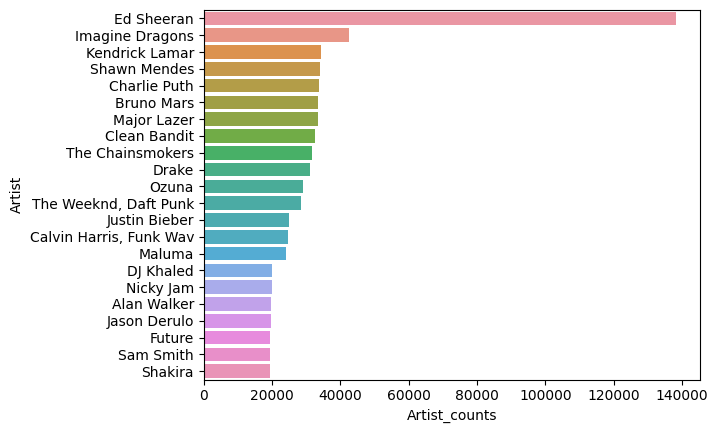

In [5]:
sns.barplot(data=df2, x="Artist_counts", y = "Artist")

Creating set of 22 most popular singers in 2017

In [13]:
set2 = set(df2["Artist"])

<font color='FF FF E0'>
<font size = '6'>
2018</font>

Reading file with data from 2018. Creating top 22 singers in 2018

In [10]:
df3 = pd.read_csv('top_chart_2018.csv', index_col=False)
df3 = df3.loc[:, ["Artist", "Artist_counts", "Title"]]
df3

,Artist,Artist_counts,Title
0,XXXTENTACION,79112,God's Plan
1,Ed Sheeran,75963,IDGAF
2,Post Malone,69991,Shape of You
3,Drake,66881,FRIENDS
4,Imagine Dragons,52748,New Rules
5,Ariana Grande,41582,Perfect
6,Dua Lipa,39599,Happier
7,Eminem,33243,Havana (feat. Young Thug)
8,Camila Cabello,32789,I Like It
9,Ozuna,31328,One Kiss (with Dua Lipa)


<AxesSubplot: xlabel='Artist_counts', ylabel='Artist'>

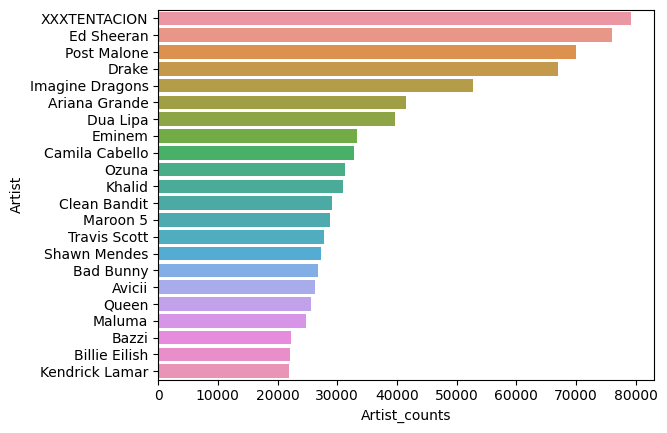

In [36]:
sns.barplot(data=df3, x="Artist_counts", y = "Artist")

Creating set of 22 most popular singers in 2018

In [12]:
set3 = set(df3["Artist"])

<font color='FF FF E0'>
<font size = '6'>
2019</font>

Reading file with data from 2019. Creating top 22 singers in 2019

In [19]:
df4 = pd.read_csv('top_chart_2019.csv', index_col=False)
df4 = df4.loc[:, ["Artist", "Artist_counts", "Title"]]
df4

,Artist,Artist_counts,Title
0,Billie Eilish,109029,bad guy
1,Ed Sheeran,88439,Shallow
2,Post Malone,82768,Sunflower - Spider-Man: Into the Spider-Verse
3,Ariana Grande,75525,Happier
4,Bad Bunny,40389,7 rings
5,Sam Smith,39581,Someone You Loved
6,Queen,36758,Dance Monkey
7,Paulo Londra,35656,Señorita
8,Lil Nas X,32991,Con Calma
9,Khalid,32541,Without Me


<AxesSubplot: xlabel='Artist_counts', ylabel='Artist'>

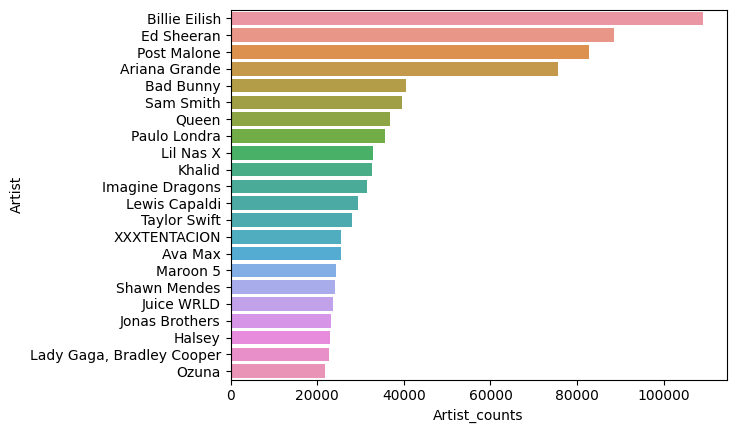

In [35]:
sns.barplot(data=df4, x="Artist_counts", y = "Artist")

Creating set of 22 most popular singers in 2019

In [21]:
set4 = set(df4["Artist"])

<font color='FF FF E0'>
<font size = '6'>
2020</font>

Reading file with data from 2020. Creating top 22 singers in 2020

In [32]:
df5 = pd.read_csv('top_chart_2020.csv', index_col=False)
df5 = df5.loc[:, ["Artist", "Artist_counts", "Title"]]
df5

,Artist,Artist_counts,Title
0,Billie Eilish,71808,Blinding Lights
1,Bad Bunny,61931,Falling
2,Dua Lipa,56677,Roses - Imanbek Remix
3,Pop Smoke,55968,Dance Monkey
4,The Weeknd,55919,death bed (coffee for your head)
5,Juice WRLD,55617,Don't Start Now
6,Harry Styles,50490,The Box
7,Travis Scott,47048,Someone You Loved
8,BTS,45349,Say So
9,Lewis Capaldi,45205,Watermelon Sugar


<AxesSubplot: xlabel='Artist_counts', ylabel='Artist'>

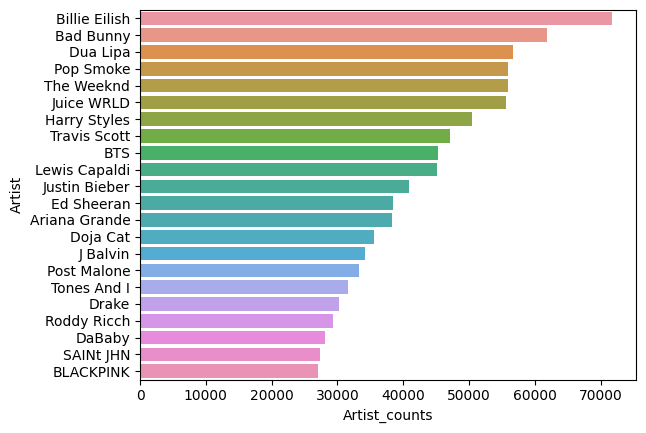

In [34]:
sns.barplot(data=df5, x="Artist_counts", y = "Artist")

Creating set of 22 most popular singers in 2020

In [24]:
set5 = set(df5["Artist"])

<font color='FF FF E0'>
<font size = '6'>
2021</font>

Reading file with data from 2021. Creating top 22 singers in 2021

In [25]:
df6 = pd.read_csv('top_chart_2021.csv', index_col=False)
df6 = df6.loc[:, ["Artist", "Artist_counts", "Title"]]
df6

,Artist,Artist_counts,Title
0,Olivia Rodrigo,93047,Astronaut In The Ocean
1,The Weeknd,68355,drivers license
2,Doja Cat,63983,Blinding Lights
3,Måneskin,60846,Levitating (feat. DaBaby)
4,Bad Bunny,59926,Save Your Tears
5,Justin Bieber,56579,MONTERO (Call Me By Your Name)
6,Dua Lipa,55271,Kiss Me More (feat. SZA)
7,BTS,54157,Watermelon Sugar
8,Billie Eilish,48633,Peaches (feat. Daniel Caesar & Giveon)
9,Ed Sheeran,46742,Beggin'


<AxesSubplot: xlabel='Artist_counts', ylabel='Artist'>

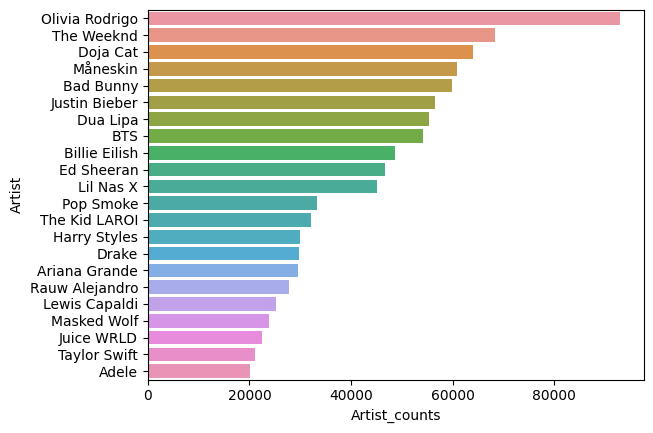

In [28]:
sns.barplot(data=df6, x="Artist_counts", y = "Artist")

Creating set of 22 most popular singers in 2021

In [26]:
set6 = set(df6["Artist"])

<font color='FF FF E0'>
<font size='6'>
Prediction for 2022</font>

Comparing sets of singers in 2020 and 2021 to predict the next year`s top chart

In [59]:
set5 & set6

{'Ariana Grande',
 'BTS',
 'Bad Bunny',
 'Billie Eilish',
 'Doja Cat',
 'Drake',
 'Dua Lipa',
 'Ed Sheeran',
 'Harry Styles',
 'Juice WRLD',
 'Justin Bieber',
 'Lewis Capaldi',
 'Pop Smoke',
 'The Weeknd'}

Finding whether any artists stayed in top for 5 years in a row

In [60]:
set2 & set3 & set4 & set5 & set6

{'Ed Sheeran'}

<font color='FF FF E0'>
<font size='6'>
How many singers actually stayed in top charts in 2020, 2021, 2022</font>

In [61]:
set1 & set5 & set6

{'Doja Cat', 'Ed Sheeran', 'Justin Bieber'}

<font color='#00FF00'>
<font size = '6'>
Conclusion</font>

20% of our prediction for top singers in 2022 are true. Only 1 singer stayed in top charts for 5 years straight - Ed Sheeran.
In conclusion, new singers HAVE a great possibility to enter top charts. Dataframe analitics shows that only 14% of singers hold their places untill 2020, so new ones can easily enter the music market. Such an example is Olivia Rodrigo. She was the first in top charts in 2021 despite the fact that we did not see her in charts before.